# 26 Working with Well Data from the Geological Survey NRW

This notebook presents the extraction of borehole data (location of wells and stratigraphy) from logs provided by the Geological Survey NRW. 

<img src="../images/tutorial26_cover.png">

## Set File Paths

If you downloaded the latest `GemGIS` from the Github repository, append the path so that the package can be imported successfully. In addition, the file path to the files within the `gemgis_data` folder is set. You can download the data [here](https://github.com/cgre-aachen/gemgis_data/archive/master.zip) if you have not done so.

In [1]:
import sys
sys.path.append('../../../../gemgis')
file_path ='../../../../gemgis_data/data/26_working_with_well_data_from_GD_NRW/'

## Loading the Well Data

The data used for GemGIS is obtained from the Geological Survey NRW. It will be used under Datenlizenz Deutschland – Namensnennung – Version 2.0 (https://www.govdata.de/dl-de/by-2-0).

The PDF Files can be loaded as strings using PyPDF2. 

In [5]:
import gemgis as gg

data = gg.misc.load_pdf(path=file_path + 'test_data.pdf')
data[:500]

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 37.16it/s]

../../../../gemgis_data/data/26_working_with_well_data_from_GD_NRW/test_data.txt successfully saved


'Stammdaten    -     2521/ 5631/ 1         -          Bnum: 196747  .  .  Objekt / Name :B. 19  ESCHWEILER\n\n  Bohrungs- / Aufschluß-Nr. :19\n\n  Archiv-Nr. :\n  Endteufe [m] :70.30\n\n  Stratigraphie der Endteufe :Karbon\n  .  TK 25 :Eschweiler [TK 5103]\n\n  Ort / Gemarkung :Eschweiler/Weißweiler\n\n  GK   Rechtswert/Hochwert [m] :2521370.00   / 5631910.00\n\n  UTM  East/North  [m] :32310019.32 / 5633520.32\n\n  Hoehe des Ansatzpunktes [mNN] :130.00\n\n  Koordinatenbestimmung :ungeprüfte Angabe aus dem Bohrarch'

## Extracting Meta Data From the Well Data

The meta data or 'Stammdaten' of the wells can be extracted using ``get_meta_data_df(...)``. Any duplicate wells will be removed automatically.

In [3]:
df = gg.misc.get_meta_data_df(data=data, 
                              name='GD')
df

,Index,DABO No.,Name,Number,Depth,X,Y,Z,X_GK,Y_GK,...,Kind,Procedure,Confidentiality,Record Type,Lithlog Version,Quality,Drilling Period,Remarks,Availability Lithlog,geometry
0,GD0001,DABO_196747,B.19ESCHWEILER,19,70.30,32310019.32,5633520.32,130.00,2521370.00,5631910.00,...,Bohrung,,"vertraulich, offen nach Einzelfallprüfung;",Übertragung eines alten Archivbestandes,1,Schichtdaten von guter Qualität; genaue strati...,,,Original-Schichtenverzeichnis liegt vor,POINT (32310019.320 5633520.320)
1,GD0002,DABO_196748,B.16ESCHWEILER,16,37.61,32310327.14,5632967.35,122.00,2521700.00,5631370.00,...,Bohrung,,"vertraulich, offen nach Einzelfallprüfung;",Übertragung eines alten Archivbestandes,1,Schichtdaten von guter Qualität; genaue strati...,,,Original-Schichtenverzeichnis liegt vor,POINT (32310327.140 5632967.350)


### Plot Data

The locations of the wells can easily be plotted using Matplotlib or the built-in GeoPandas functions.

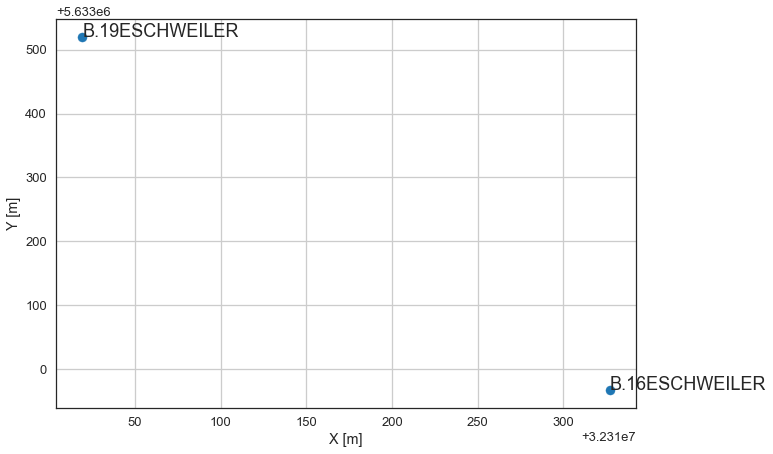

In [4]:
import matplotlib.pyplot as plt

plt.scatter(df['X'], df['Y'])
plt.grid()
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
for i in range(len(df)):
    plt.text(df['X'].loc[i], df['Y'].loc[i], df['Name'].loc[i])

## Extracting Stratigraphic Data from Well Data

The stratigraphic data can be extracted using ``get_stratigraphic_data_df(..)``. Different files have to be loaded beforehand to make the workflow work. This includes a file containing symbols that will be filtered out and the classification of the different formations.

In [5]:
data = gg.misc.load_pdf(path=file_path + 'test_data.pdf', 
                        save_as_txt=True)

data[:500]

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 66.64it/s]

../../../../gemgis_data/data/26_working_with_well_data_from_GD_NRW/test_data.txt successfully saved


'Stammdaten    -     2521/ 5631/ 1         -          Bnum: 196747  .  .  Objekt / Name :B. 19  ESCHWEILER\n\n  Bohrungs- / Aufschluß-Nr. :19\n\n  Archiv-Nr. :\n  Endteufe [m] :70.30\n\n  Stratigraphie der Endteufe :Karbon\n  .  TK 25 :Eschweiler [TK 5103]\n\n  Ort / Gemarkung :Eschweiler/Weißweiler\n\n  GK   Rechtswert/Hochwert [m] :2521370.00   / 5631910.00\n\n  UTM  East/North  [m] :32310019.32 / 5633520.32\n\n  Hoehe des Ansatzpunktes [mNN] :130.00\n\n  Koordinatenbestimmung :ungeprüfte Angabe aus dem Bohrarch'

### Load Well Data from txt-file

The data can be loaded from a text file so that the original PDF does not have to be reloaded again to save time.

In [6]:
with open(file_path + 'test_data.txt', "r") as text_file:
    data = text_file.read()

### Load Symbols from txt-file

Symbols that will be removed by default from the well data can be loaded from a text file.

In [7]:
with open(file_path + 'symbols.txt', "r") as text_file:
    symbols = [(i, '') for i in text_file.read().splitlines()]

symbols

[('.m ', ''),
 (', ', ''),
 ('; ', ''),
 (': ', ''),
 ('/ ', ''),
 ('? ', ''),
 ('! ', ''),
 ('-"- ', ''),
 ('" ', ''),
 ('% ', ''),
 ('< ', ''),
 ('> ', ''),
 ('= ', ''),
 ('~ ', ''),
 ('_ ', ''),
 ('Â° ', ''),
 ("' ", '')]

### Load Formations from txt-file

Classified formations can be loaded from a text file.

In [8]:
with open(file_path + 'formations.txt', "rb") as text_file:
    formations = text_file.read().decode("UTF-8").split()
    
formations = [(formations[i], formations[i+1]) for i in range(0,len(formations)-1,2)]
formations[:10]

[('UnterdevonKalltalFormation', 'KalltalFM'),
 ('nullLöss', 'Quaternary'),
 ('QuartärFlugsand', 'Quaternary'),
 ('QuartärHauptterrassen', 'Quaternary'),
 ('QuartärSandlöss', 'Quaternary'),
 ('QuartärHochflutablagerungen', 'Quaternary'),
 ('QuartärAnthropogeneBildungen(künstlicheAufschüttung)', 'Quaternary'),
 ('QuartärVerschwemmungsablagerungenFrostbodenbildungenundRutschmassen',
  'Quaternary'),
 ('QuartärLösslehm', 'Quaternary'),
 ('QuartärHochflutlehm', 'Quaternary')]

### Extracting the Stratigraphic Data

After loading the symbols and formations, the stratigraphic data can be extracted. The (Geo-)DataFrame contains the index, the well name, X, Y and Z coordinates, the altitudes, the depths, the formations and a geometry column. 

In [9]:
df = gg.misc.get_stratigraphic_data_df(data=data, 
                                       name='GD', 
                                       symbols=symbols,
                                       formations=formations,
                                       return_gdf=True)
df

,Index,Name,X,Y,Z,Altitude,Depth,formation,geometry
0,GD0001,B.19ESCHWEILER,32310019.32,5633520.32,125.30,130.00,70.30,Quaternary,POINT (32310019.320 5633520.320)
1,GD0001,B.19ESCHWEILER,32310019.32,5633520.32,66.50,130.00,70.30,Miocene,POINT (32310019.320 5633520.320)
2,GD0001,B.19ESCHWEILER,32310019.32,5633520.32,60.90,130.00,70.30,Oligocene,POINT (32310019.320 5633520.320)
3,GD0001,B.19ESCHWEILER,32310019.32,5633520.32,59.70,130.00,70.30,Carboniferous,POINT (32310019.320 5633520.320)
4,GD0002,B.16ESCHWEILER,32310327.14,5632967.35,117.80,122.00,37.61,Quaternary,POINT (32310327.140 5632967.350)
5,GD0002,B.16ESCHWEILER,32310327.14,5632967.35,84.40,122.00,37.61,Miocene,POINT (32310327.140 5632967.350)
6,GD0002,B.16ESCHWEILER,32310327.14,5632967.35,84.39,122.00,37.61,Carboniferous,POINT (32310327.140 5632967.350)


### Plotting data

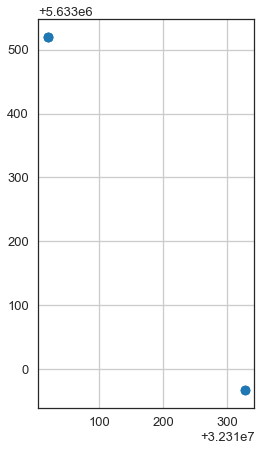

In [10]:
df.plot()
plt.grid()